# III. Preprocessing and Modeling

###### Before I start modeling I need to make sure I have my data imported

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import time
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# SKlearn imports:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, RocCurveDisplay
from sklearn.metrics import r2_score, f1_score, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score, recall_score, accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn import set_config
set_config(display = 'diagram')
import warnings
warnings.filterwarnings('ignore')
#Katie helped with the code for this since the original wasn't working
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [10]:
subreddits=pd.read_csv('./data/final_df')

In [11]:
subreddits.columns

Index(['Unnamed: 0', 'subreddit', 'title', 'is_mgs', 'clean_title',
       'title_length', 'title_word_count'],
      dtype='object')

In [12]:
X,y=subreddits['clean_title'],subreddits['is_mgs']

###### Baseline is close to 50%

In [13]:
y.value_counts(normalize = True)

1    0.502518
0    0.497482
Name: is_mgs, dtype: float64

###### I need to train test split for model creation

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

###### Model 1 is a Naive-Bayes model with count vectorizer. This version has no paramaters modified

In [15]:
cvect_pipe1=make_pipeline(CountVectorizer(),
                    MultinomialNB())
cvect_pipe1.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [16]:
print('Score Train: ', cvect_pipe1.score(X_train, y_train))
print('Score Test: ', cvect_pipe1.score(X_test, y_test))

Score Train:  0.9717741935483871
Score Test:  0.7550200803212851


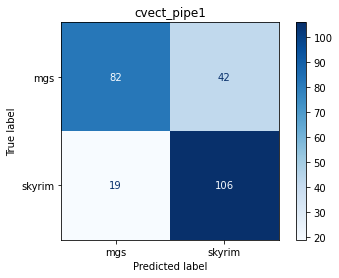

In [17]:
ConfusionMatrixDisplay.from_estimator(cvect_pipe1, X_test, y_test,cmap='Blues',display_labels=['mgs','skyrim']);
plt.title('cvect_pipe1');

###### Model 1.5: cvect_pipe1 with parameters modified using GridSearch

In [18]:
cvect_pipe1=make_pipeline(CountVectorizer(),
                    MultinomialNB())

cvect_pipe1.fit(X_train,y_train)

cvect_pipe1.get_params()

#Katie helped with this
params={'countvectorizer__ngram_range': [(1, 1),(1,2)],
        'countvectorizer__max_features': [1000,2000],
        'countvectorizer__stop_words': [None,'english']}


gs1=GridSearchCV(cvect_pipe1,params,cv=5,n_jobs=-1)
gs1.fit(X_train,y_train)
print('Best Params: ',gs1.best_params_)
print('Best Estimator Score Train: ', gs1.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs1.best_estimator_.score(X_test, y_test))

Best Params:  {'countvectorizer__max_features': 2000, 'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': 'english'}
Best Estimator Score Train:  0.9704301075268817
Best Estimator Score Test:  0.7389558232931727


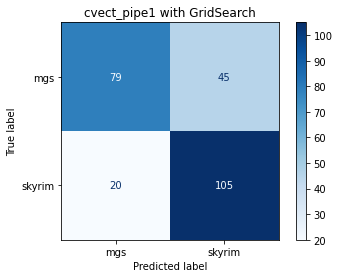

In [19]:
plot_confusion_matrix(gs1, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim']);
plt.title("cvect_pipe1 with GridSearch");

###### Model 2 will be a similar model, but will use TfidfVectorizer with some modified parameters

In [20]:
#add more
tfidf_pipe1=make_pipeline(TfidfVectorizer(stop_words = 'english', max_features=1000),
                    MultinomialNB())

params={'tfidfvectorizer__ngram_range': [(1, 1),(1,2)],
        'tfidfvectorizer__max_features': [1000,2000],
        'tfidfvectorizer__stop_words': [None,'english']}


gs2=GridSearchCV(tfidf_pipe1,params)
gs2.fit(X_train,y_train)
print('Best Params: ',gs2.best_params_)
print('Best Estimator Score Train: ', gs2.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs2.best_estimator_.score(X_test, y_test))

Best Params:  {'tfidfvectorizer__max_features': 2000, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__stop_words': 'english'}
Best Estimator Score Train:  0.9838709677419355
Best Estimator Score Test:  0.7429718875502008


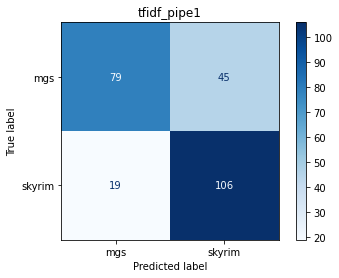

In [21]:
plot_confusion_matrix(gs2, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim']);
plt.title("tfidf_pipe1");

###### Model 3 will use CountVectorizer with StandardScaler and Logistic regresstion. They will have modified parameters as well, and GridSearch is used on CountVectorizer

In [22]:
cvect_pipe2 = make_pipeline(CountVectorizer(),
                           StandardScaler(with_mean=False),
                          LogisticRegression(penalty = 'none', max_iter = 2000))

params={'countvectorizer__max_features': [None, 1000,2000],
        'countvectorizer__ngram_range': [(1, 1),(1,2),(2,2)],
        'countvectorizer__stop_words': [None,'english']}


gs3=GridSearchCV(cvect_pipe2,params)
gs3.fit(X_train,y_train)
print('Best Params: ',gs3.best_params_)
print('Best Estimator Score Train: ', gs3.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs3.best_estimator_.score(X_test, y_test))

Best Params:  {'countvectorizer__max_features': 2000, 'countvectorizer__ngram_range': (1, 2), 'countvectorizer__stop_words': None}
Best Estimator Score Train:  0.9865591397849462
Best Estimator Score Test:  0.7710843373493976


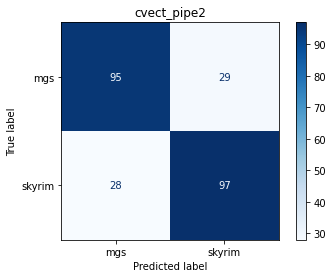

In [23]:
plot_confusion_matrix(gs3, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim']);
plt.title("cvect_pipe2");

###### Model 4 with TfidfVectorizer and Logistic Regression

In [24]:
tfidf_pipe2 = make_pipeline(TfidfVectorizer(),
                           StandardScaler(with_mean=False),
                          LogisticRegression(penalty = 'none', max_iter = 1000))

params={'tfidfvectorizer__max_features': [None, 1000,2000],
        'tfidfvectorizer__ngram_range': [(1, 1),(1,2),(2,2)],
        'tfidfvectorizer__stop_words': [None,'english']}


gs4=GridSearchCV(tfidf_pipe2,params)
gs4.fit(X_train,y_train)
print('Best Params: ',gs4.best_params_)
print('Best Estimator Score Train: ', gs4.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs4.best_estimator_.score(X_test, y_test))

Best Params:  {'tfidfvectorizer__max_features': 2000, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__stop_words': None}
Best Estimator Score Train:  0.9865591397849462
Best Estimator Score Test:  0.7630522088353414


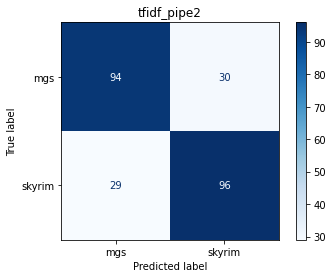

In [25]:
plot_confusion_matrix(gs4, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim']);
plt.title("tfidf_pipe2");

###### Model 5 with CountVectorizer and RandomForestClassifier

In [26]:
cvect_pipe3 = make_pipeline(CountVectorizer(),
                           RandomForestClassifier())

params={'countvectorizer__max_features': [None, 1000,2000],
        'countvectorizer__ngram_range': [(1, 1),(1,2),(2,2)],
        'countvectorizer__stop_words': [None,'english'],
        'randomforestclassifier__criterion': ['gini'],
        'randomforestclassifier__max_depth': [25,30],
        'randomforestclassifier__n_estimators': [20,40,60]}
        


gs4=GridSearchCV(cvect_pipe3,params,cv=5)
gs4.fit(X_train,y_train)
print('Best Params: ',gs4.best_params_)
print('Best Estimator Score Train: ', gs4.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs4.best_estimator_.score(X_test, y_test))

Best Params:  {'countvectorizer__max_features': 1000, 'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': 'english', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 40}
Best Estimator Score Train:  0.831989247311828
Best Estimator Score Test:  0.7911646586345381


In [27]:
cvect_pipe3.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'countvectorizer': CountVectorizer(),
 'randomforestclassifier': RandomForestClassifier(),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': None,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomfor

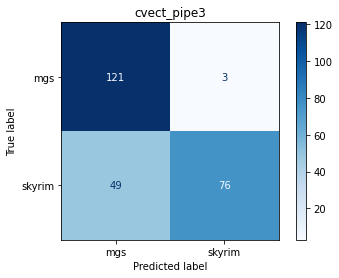

In [28]:
plot_confusion_matrix(gs4, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim']);
plt.title("cvect_pipe3");

###### Model 6  with TfidfVectorizer and RandomForestClassifier

In [29]:
tfidf_pipe3 = make_pipeline(TfidfVectorizer(),
                           RandomForestClassifier())

params={'tfidfvectorizer__max_features': [None, 1000,2000],
        'tfidfvectorizer__ngram_range': [(1, 1),(1,2),(2,2)],
        'tfidfvectorizer__stop_words': [None,'english'],
        'randomforestclassifier__criterion': ['gini'],
        'randomforestclassifier__max_depth': [25,30],
        'randomforestclassifier__n_estimators': [20,40,60]}
        


gs4=GridSearchCV(tfidf_pipe3,params,cv=5)
gs4.fit(X_train,y_train)
print('Best Params: ',gs4.best_params_)
print('Best Estimator Score Train: ', gs4.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs4.best_estimator_.score(X_test, y_test))

Best Params:  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 20, 'tfidfvectorizer__max_features': None, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__stop_words': 'english'}
Best Estimator Score Train:  0.8521505376344086
Best Estimator Score Test:  0.8032128514056225


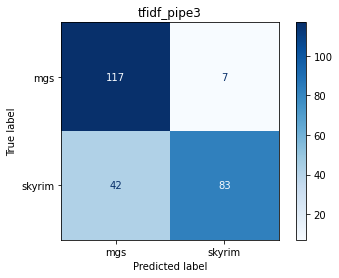

In [62]:
plot_confusion_matrix(gs4, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim']);
plt.title("tfidf_pipe3");

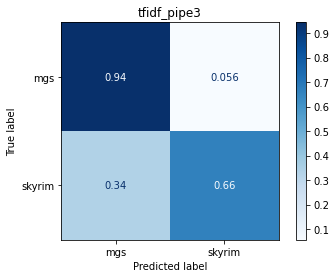

In [65]:
plot_confusion_matrix(gs4, X_test, y_test, cmap='Blues',display_labels=['mgs','skyrim'],normalize='true');
plt.title("tfidf_pipe3");

In [39]:
ft_imp=gs4.best_estimator_.named_steps["randomforestclassifier"].feature_importances_

In [40]:
ft_names=gs4.best_estimator_.named_steps["tfidfvectorizer"].get_feature_names_out()

In [42]:
words=pd.DataFrame(ft_imp,index=ft_names)

In [46]:
sorted_words=words.sort_values(by=0,ascending=False)

In [47]:
sorted_words

,0
gear,0.099360
skyrim,0.076080
metal,0.039361
snake,0.035426
solid,0.028512
...,...
ground,0.000000
grindstone,0.000000
greybeard,0.000000
grenade,0.000000


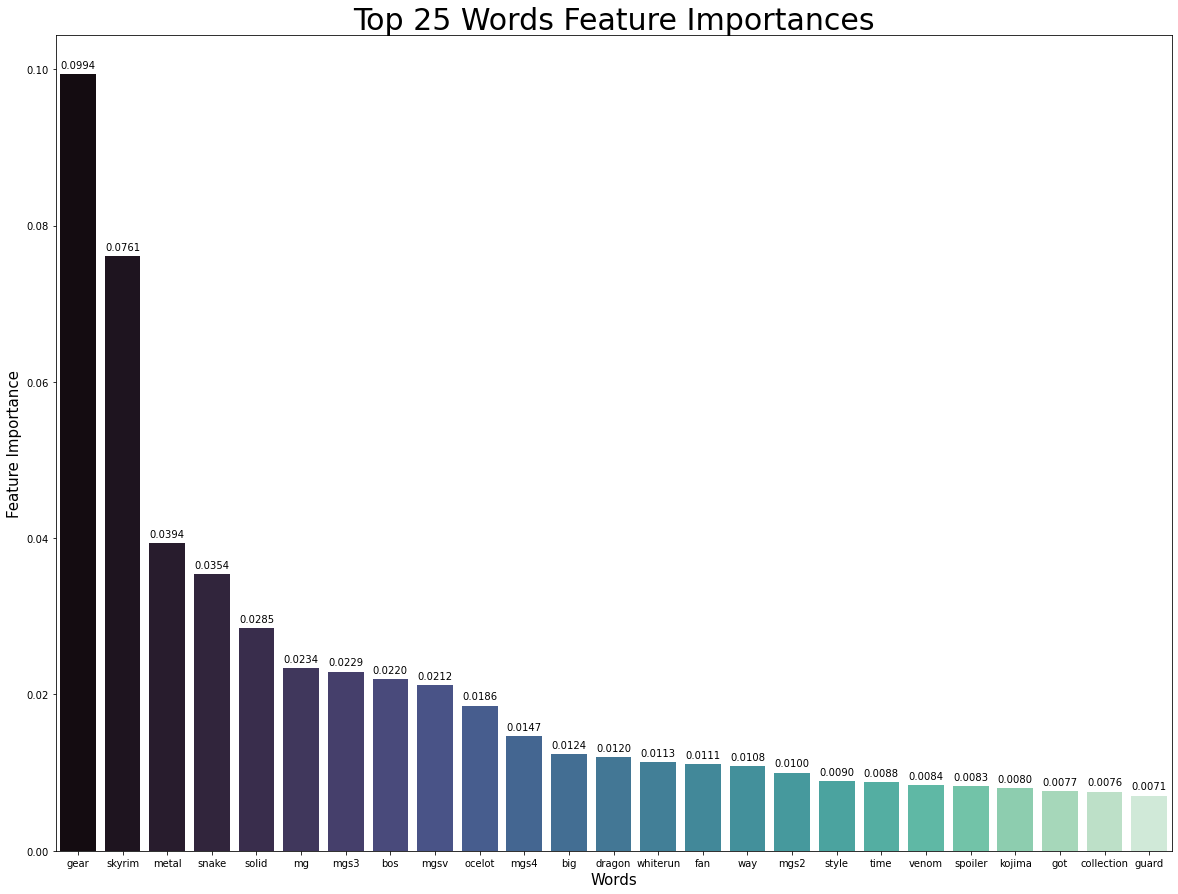

In [61]:
top25=sorted_words[:25]

top25
top25.rename(columns={0:'feature_importances'},inplace=True)

plt.figure(figsize=(20,15))
plt.title("Top 25 Words Feature Importances",fontsize=30)
bplot=sns.barplot(data=top25,y=top25['feature_importances'],x=top25.index,palette='mako',orient='v');
#helped by Katie
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Words',fontsize=15);
plt.ylabel('Feature Importance',fontsize=15);

# IV.Conclusion

After running several models with different parameters I was able to find some that worked better than others on predicting the right subreddit. The model that worked best was Model 6 which preprocesses with TfidfVectorizer and then fits to a RandomTreeClassifier. The results yielded a train score of 0.852, and test score of 0.803 which is a 30% increase from the baseline model. This model is unfortunately not very interpretable, but with the feature importances we can see which words are important in determining the classification of the the subreddits. The model falls short because the false negatives appear 34% of the time. However false positives only appear 5% of the time. This indicates that the model is more accurate in predicting the correct outcomes based on metal gear solid key words, but had trouble with predicting based on skyrim's key words.
Overall I would still recommend this model to be used to predict subreddit posts for metal gear solid to Konami in order to make announcements when the subreddit is highly active.